# 서브플롯
Matplotlib를 사용하여 하나의 그래픽 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다
## #01. 필요한 패키지 및 샘플 데이터 준비


#### 1) 패키지 참조


In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import numpy as np

#### 2) 데이터 가져오기

년도별 교통사고 발생건수, 사망자수, 부상자수 데이터

In [3]:

df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col='년도' )
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


#### 3) 그래프 전역설정


In [6]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

## #02. 서브플롯 영역 나누기

### 1) 2행 3열을 갖는 서브플롯 영역 생성하기 

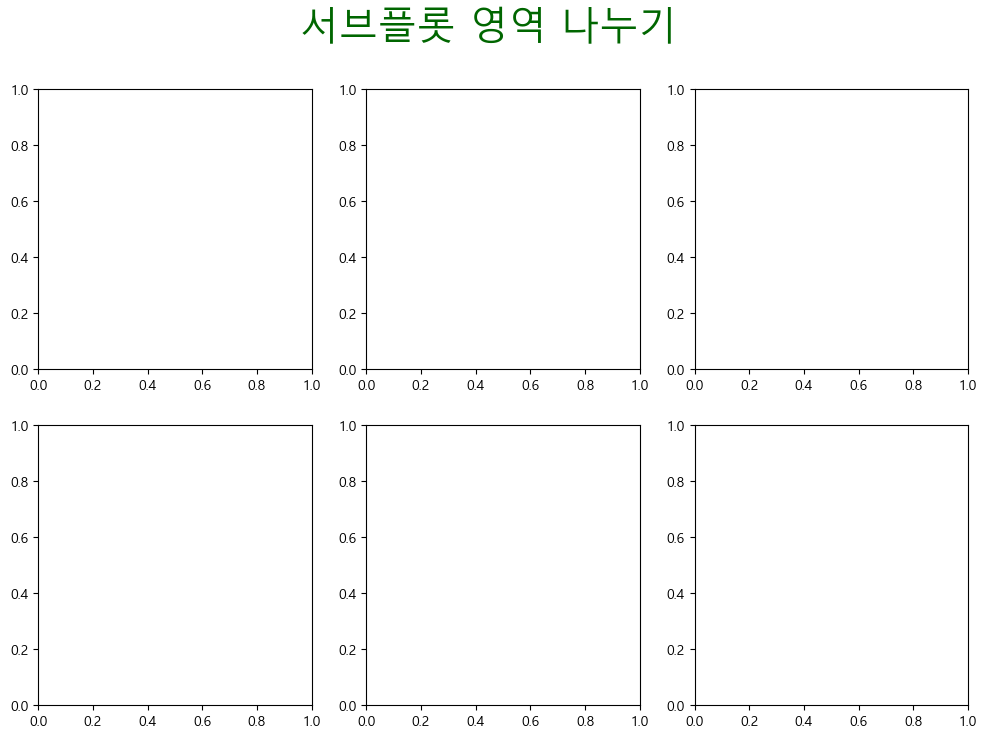

In [10]:
## 서브플롯 생성 -> 2행 3열

# -> fig 객체 : 그래픽 처리기능을 제공
# -> ax 객체 : 분할된 각 그래프 영역 (리스트)
fig,ax = plt.subplots(2,3)

# 전체 제목
fig.suptitle("서브플롯 영역 나누기",fontsize = 28,color="#006600")
# 각 그래프 간의 가로 세로 간격 지정

fig.subplots_adjust(wspace=0.2,hspace=0.2)

plt.show()
plt.close()

## #03. 서브플롯에 그래프 그리기

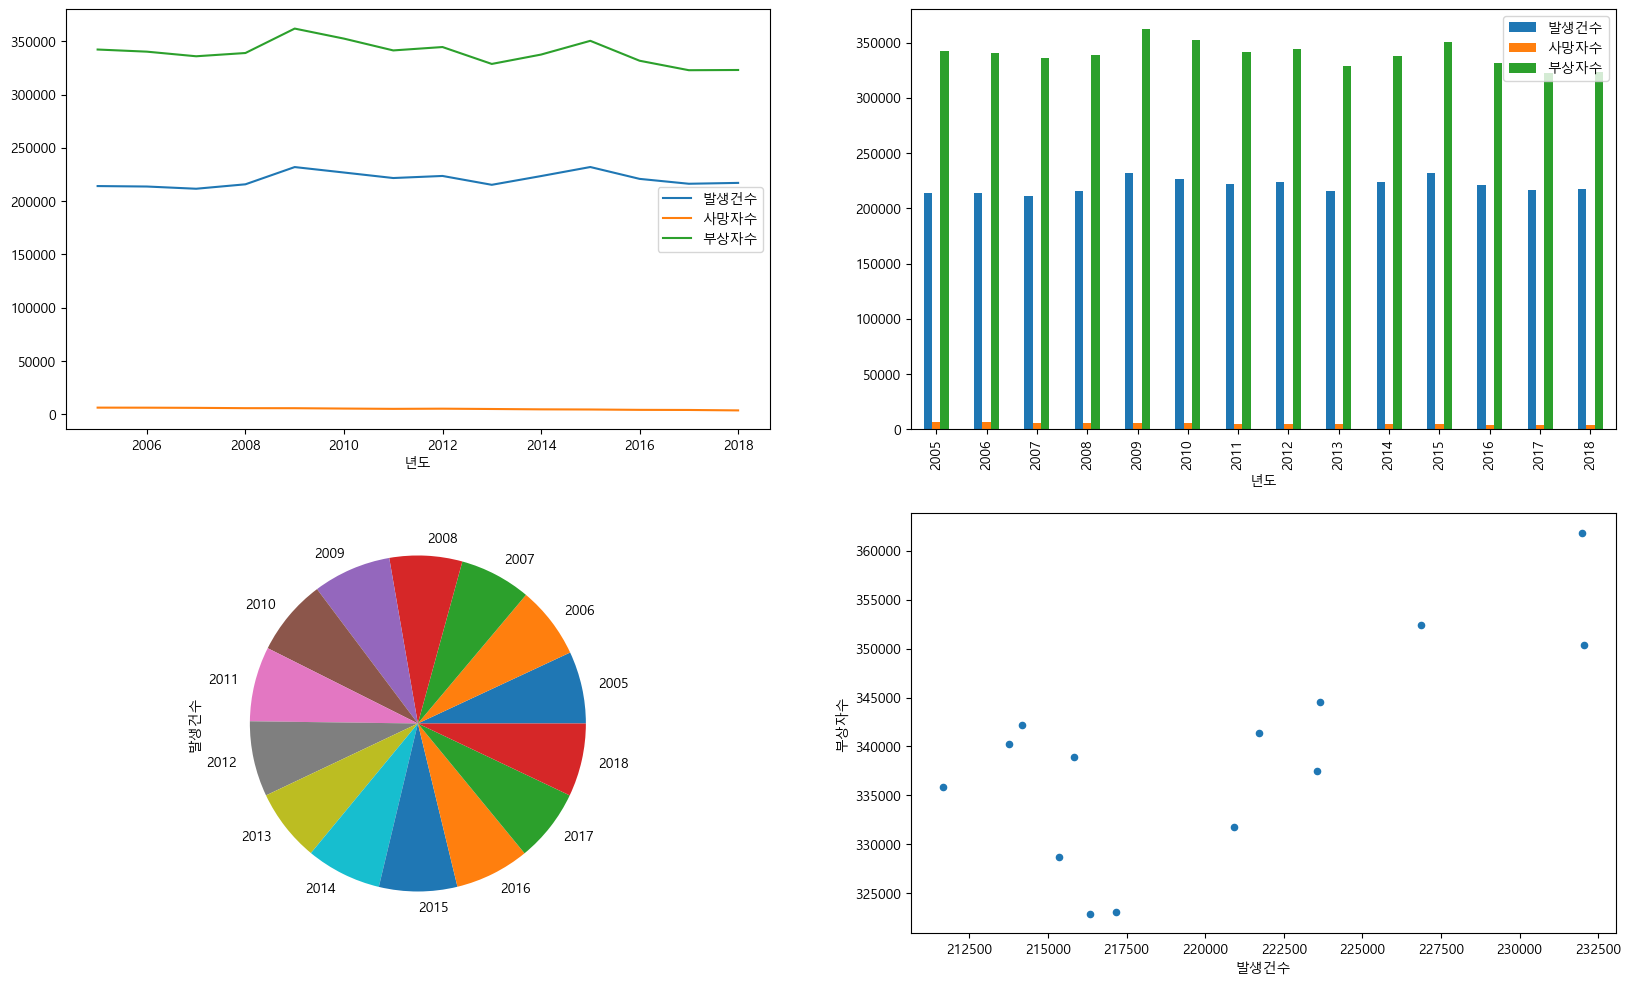

In [16]:
# 2행 2열의 영역 생성
# ax에 반환되는 객체는 서브플롯의 행,열에대한 n차원 리스트
# -> figsize 파라미터는 그래픽의 크기, plt.reParams['figure.figsize']보다 우선시된다

fig,ax=plt.subplots(2,2, figsize=(20,12))

## 데이터 프래임을 기반으로 각 영역에 그래프 종류별 표시
df.plot(ax=ax[0][0])
df.plot.bar(ax=ax[0][1])
df['발생건수'].plot.pie(ax=ax[1][0])
df.plot.scatter(x='발생건수',y='부상자수',ax=ax[1][1])
# 그래프로 출력
plt.show()
plt.close()


## #04. 서브플롯 영역에 옵션 지정하기

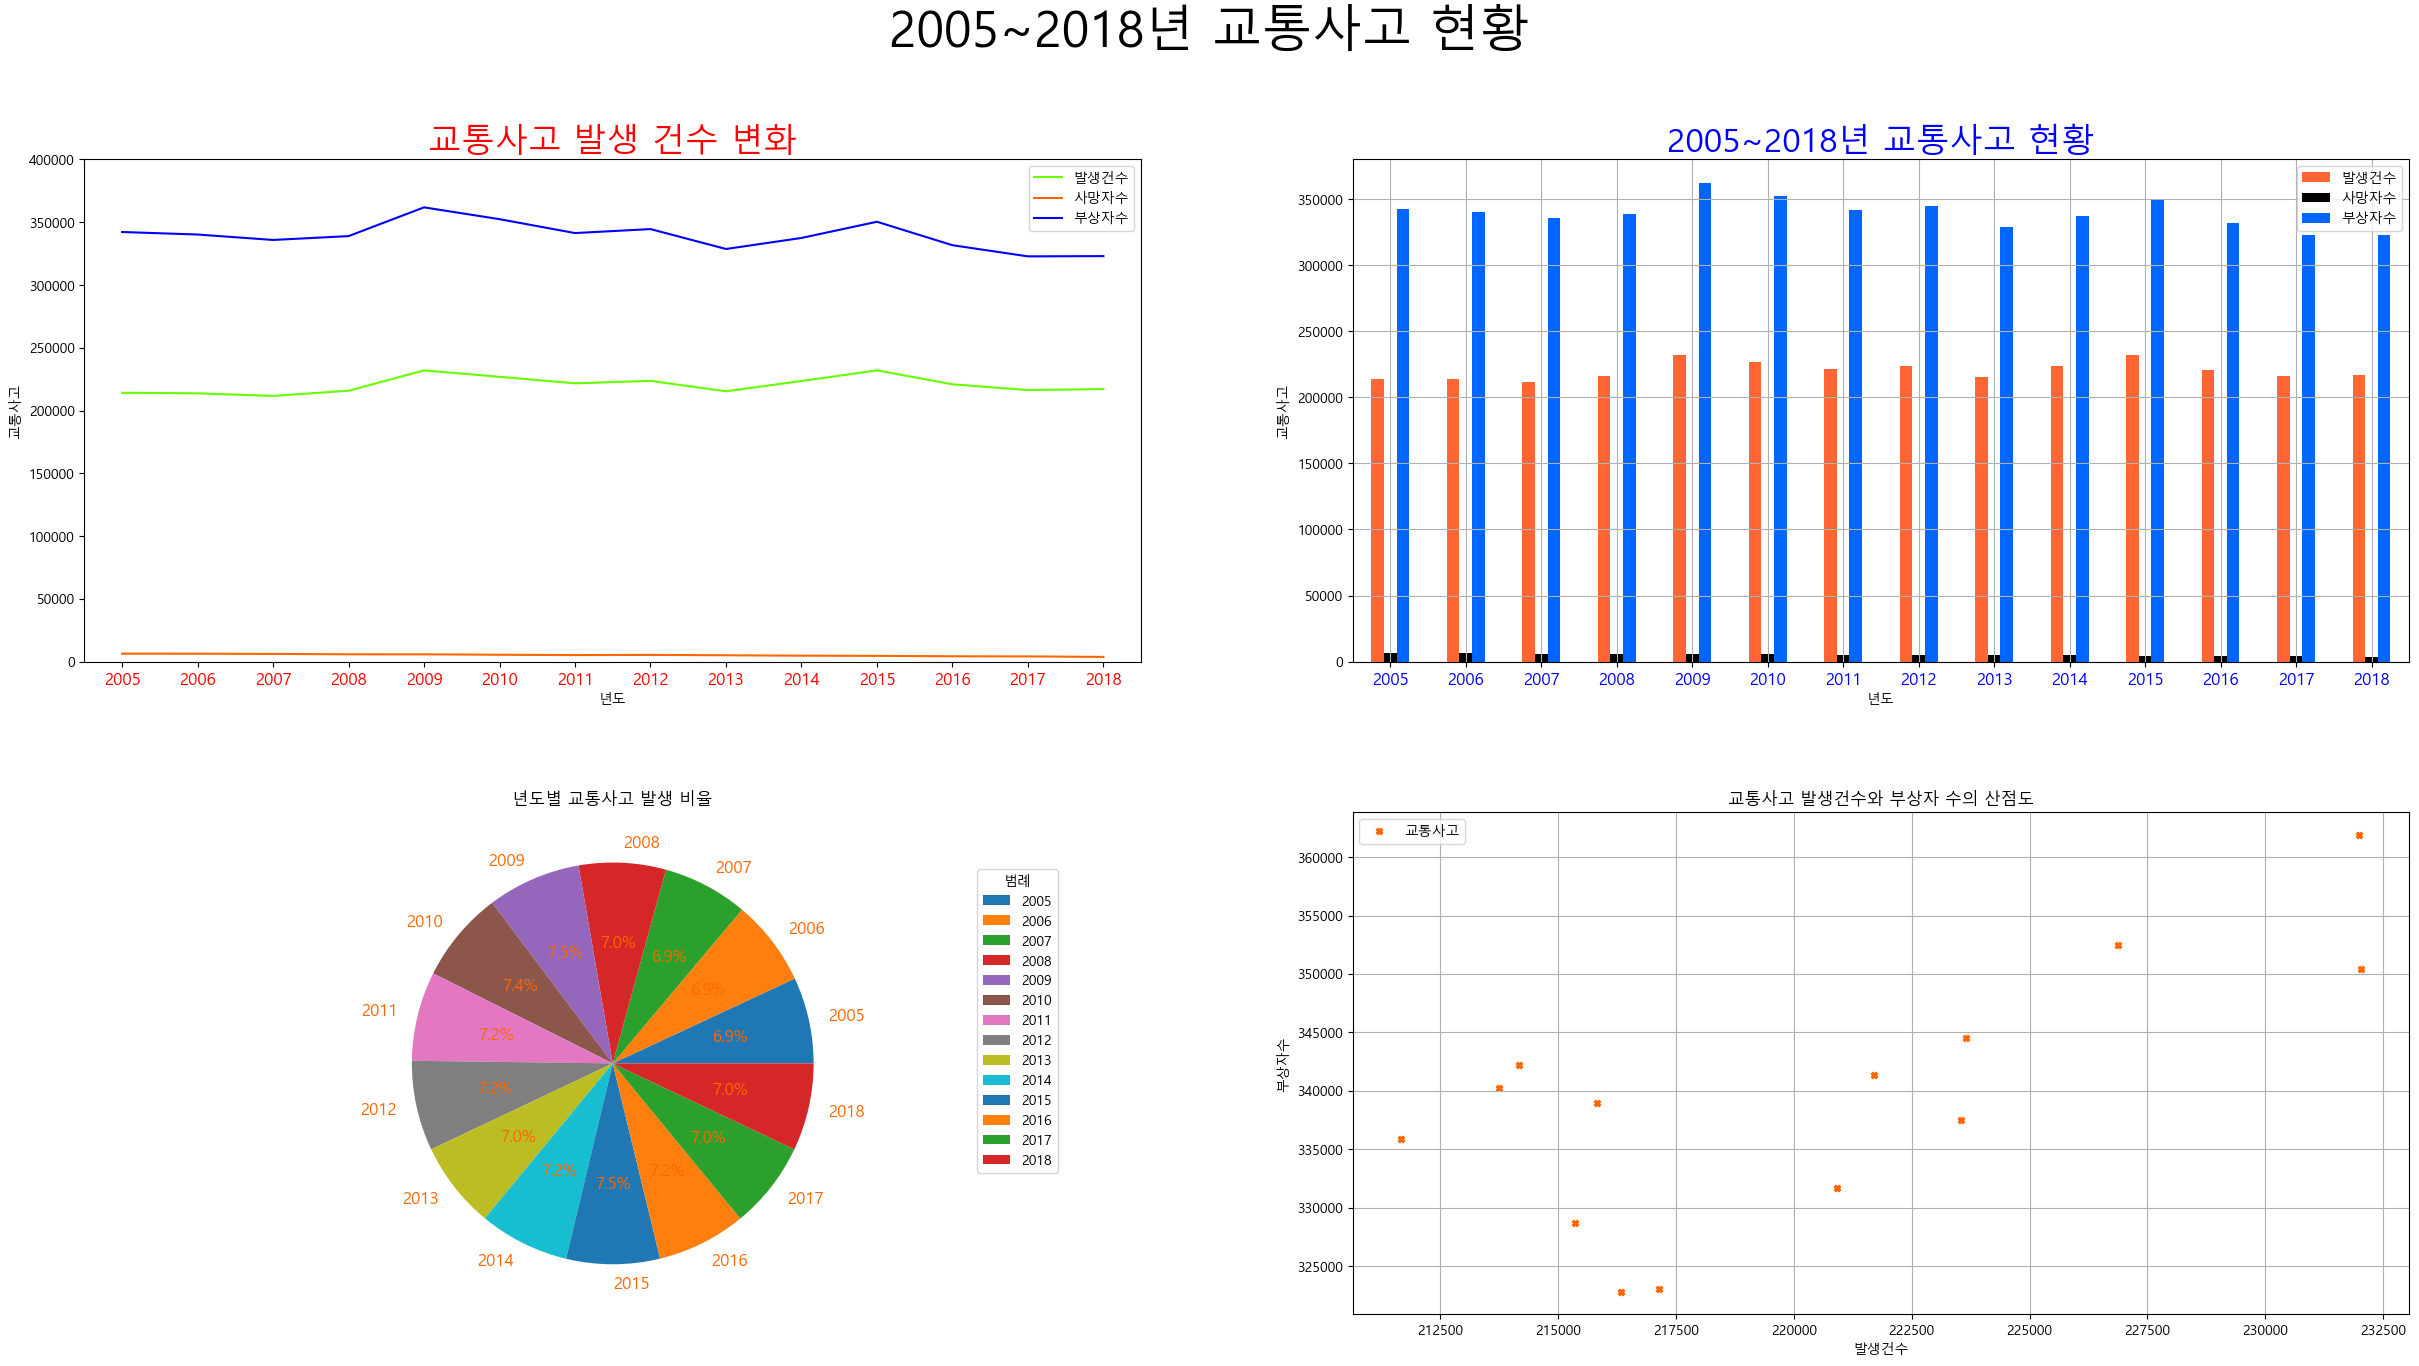

In [31]:
#--------------------------------------------------------------
# 2행 2열의 영역을 생성한다
#--------------------------------------------------------------

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2 ,figsize=(30,15))

# 전체제목

fig.suptitle('2005~2018년 교통사고 현황',fontsize=36,color='#000000')

# 각 그래프 간의 가로 세로 간격 지정
fig.subplots_adjust(wspace=0.2,hspace=0.3)

#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 년도별 교통사고에 대한 선 그래프
#--------------------------------------------------------------
df.plot(ax=ax1,color=['#66ff00', '#ff6600', '#0000ff'])

# 그래프 제목의 텍스트, 글자크기, 색상

ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color("#ff0000")

## x축과 y축의 라벨 지정
ax1.set(xlabel="년도",ylabel='교통사고')

## plt를 직접 사용할 경우 xticks(x축좌표,표시할텍스트) 형식으로 지정하지만 
## 서브플롯을 x축의 좌표와 표시할 텍스트를 나누어서 처리
start = min(df.index)
end = max(df.index)

x= list(range(start,end+1))

# 좌표설정
ax1.set_xticks(x)
## 지정된 좌표에 표시할 텍스트 지정
ax1.set_xticklabels(df.index,fontsize=12,color="#ff0000")

# x축,y축의 ㅂ범위
ax1.set_xlim([start-0.5,end+0.5])
ax1.set_ylim([0,400000])

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
#--------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정

df.plot.bar(ax=ax2,rot=0,color = ['#ff6633', '#000000', '#0066ff'])
# 배경 격자 표시
ax2.grid()
## 그래프 제목의 텍스트, 글자크기,색상
ax2.title.set_text("2005~2018년 교통사고 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color("#0000ff")

## x축의 좌표만 지정함. (막대그래프의 경우 x축 좌표는 무조건 0 에서부터 시작)
ax2.set_xticks(list(range(0,len(df.index))))

## x축 좌표에 표시될 텍스트 리스트 지정
ax2.set_xticklabels(df.index,fontsize = 12 , color="#0000ff")

## x축과 y축의 라벨을 지정 
ax2.set(xlabel="년도",ylabel="교통사고")

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 파이 그래프
#--------------------------------------------------------------
# 파이그래프

df['발생건수'].plot.pie(ax=ax3, labels=df.index, autopct="%0.1f%%", 
                        textprops={'color':"#ff6600", 'fontsize': 12})
## 그래프 제목

ax3.title.set_text("년도별 교통사고 발생 비율")

# y축 라벨 불필요하므로 제거 
ax3.set(ylabel=None)

## 범례 표시
ax3.legend(labels=df.index,title="범례",bbox_to_anchor = (1.4,0.9))
#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 산점도 그래프
#--------------------------------------------------------------
# 산점도 그래프

df.plot.scatter(ax=ax4,x='발생건수',y='부상자수',color="#ff6600",marker = "X",label = "교통사고")

# 그래프 제목 지정
ax4.title.set_text('교통사고 발생건수와 부상자 수의 산점도')
# 격자 설정
ax4.grid()

# x축 ,y축 라벨
ax4.set(xlabel='발생건수',ylabel='부상자수')

#--------------------------------------------------------------
# 그래프 출력하기
#--------------------------------------------------------------
plt.show()
plt.close()

## #05. 두개의 y축을 갖는 그래프
### 1) 샘플데이터 만들기

#### x축 데이터 (공용)

In [32]:
x = list(range(0, 10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 첫번째 y축 데이터


In [33]:
y1 = list(range(0, 10, 1))
y1


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 두번쨰 y축 데이터

In [34]:
y2 = list(np.arange(0, 5, 0.5))
y2


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

### 2) 기본 그래프 구현

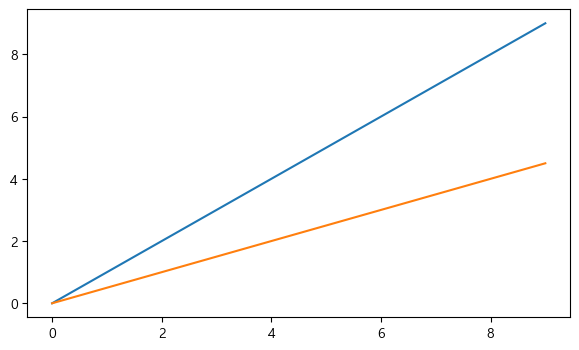

In [35]:
plt.rcParams['figure.figsize'] = (7,4)

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()
plt.close()

### 3) 서브플롯으로 2개의 y축을 갖는 그래프 구현

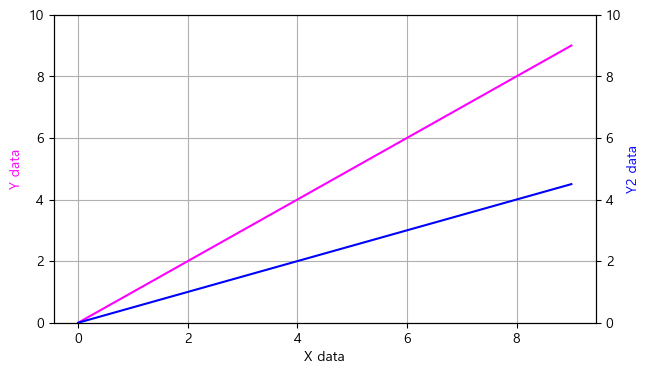

In [42]:
# 그래프 시작
fig, ax1 = plt.subplots(1,1,figsize=(7,4))

# ax1에 겹쳐지는 쌍둥이 서브플롯 생성
ax2=ax1.twinx()

## ax1에 그래프 그리기

ax1.plot(x,y1,color="#ff00ff")
ax1.set_xlabel("X data")
ax1.set_ylabel("Y data",color='#ff00ff')
ax1.grid()
ax1.set_ylim([0,10])

## ax2에 그래프 그리기
ax2.plot(x,y2,color="#0000ff")
ax2.set_ylabel("Y2 data",color = "#0000ff")
ax2.set_ylim([0,10])
plt.show()
plt.close()

### 06. (예제) 교통사고 발생건수와 사망자수 변화 시각화하기

우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안) 을 개정한 이후 꾸준히 교통사고안전기준을 강화해 왔다.

이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는지 알아보자.



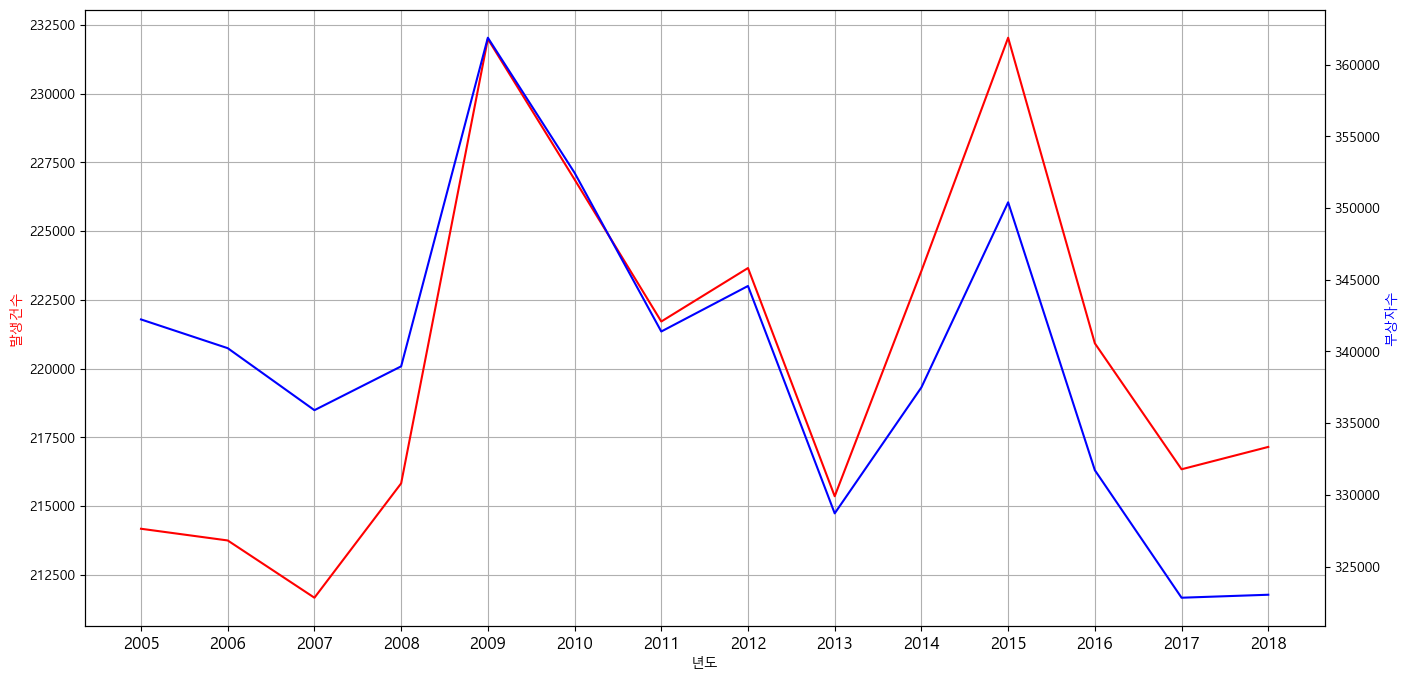

In [46]:
fig,ax1 = plt.subplots(1,1,figsize=(16,8))
ax2=ax1.twinx()

## ax1에 그래프 그리기 

df['발생건수'].plot(ax=ax1,color="#ff0000")
ax1.set_xlabel("년도")
ax1.set_ylabel("발생건수",color="#ff0000")
ax1.grid()
## x축 좌표위의 텍스트 처리

start=min(df.index)
end=max(df.index)
ax1.set_xticks(list(range(start,end+1)))
ax1.set_xticklabels(df.index,fontsize=12,color="#000000")

## ax2에 그래프 그리기
df['부상자수'].plot(ax=ax2,color="#0000ff")
ax2.set_ylabel("부상자수",color='#0000ff')
plt.show()
plt.close()